### Assignment 4

### 1. Download Dataset

In [1]:
# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

### 2. Load the dataset into the tool.

In [4]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.drop(["CustomerID"],axis="columns",inplace=True)

### 3. Perform Below Visualizations.
- Univariate Analysis
- Bi- Variate Analysis
- Multi-Variate Analysis

### Uni-Variate Analysis

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Density'>

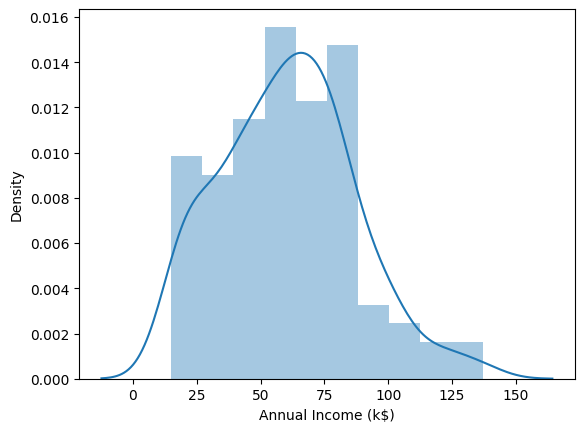

In [6]:
sns.distplot(df['Annual Income (k$)'])

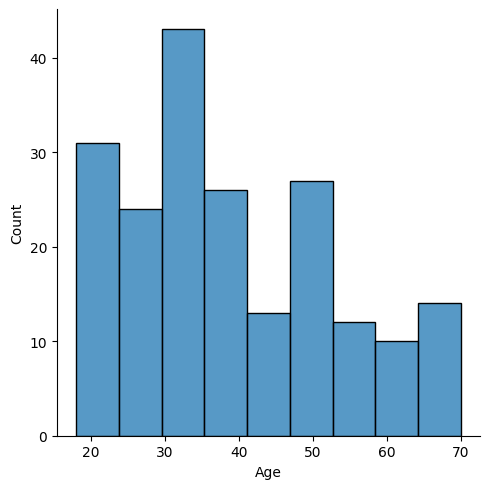

In [7]:
sns.displot(df['Age'])

### Bi-variate Analysis

<AxesSubplot: >

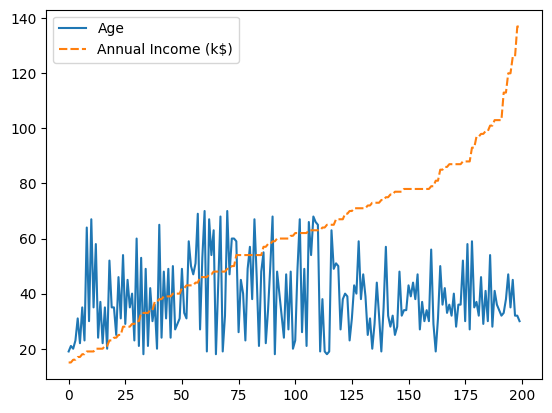

In [8]:
sns.lineplot((df['Age'],df["Annual Income (k$)"]))

<AxesSubplot: ylabel='Density'>

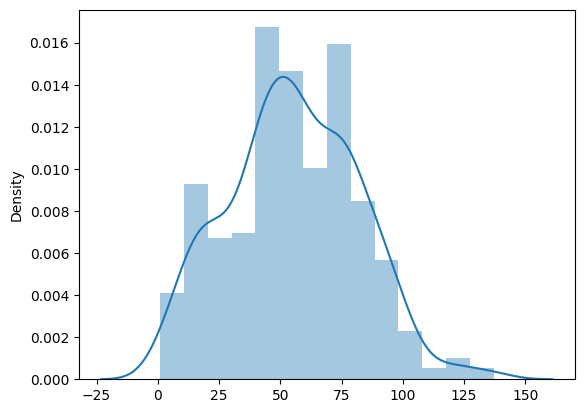

In [9]:
sns.distplot((df["Spending Score (1-100)"],df["Annual Income (k$)"]))

### Multi-variate Analysis 

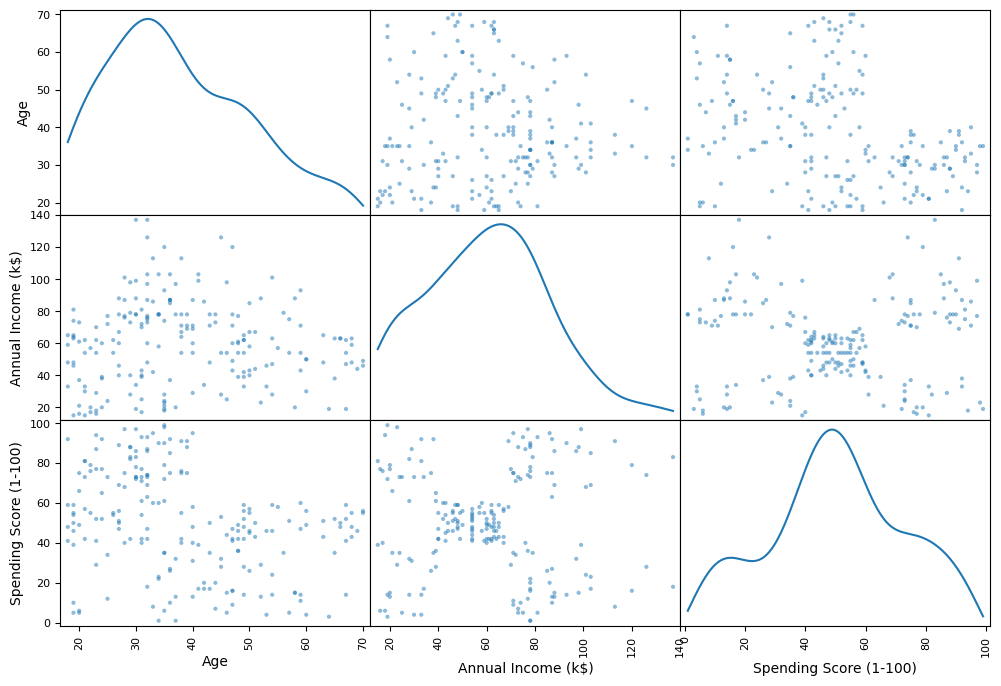

In [10]:
pd.plotting.scatter_matrix(df.loc[:, "Age":"Spending Score (1-100)"], diagonal="kde",figsize=(12,8))
plt.show()

### 4. Perform descriptive statistics on the dataset.

In [11]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### 5. Check for Missing values and deal with them.

In [12]:
df.isnull().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [13]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 6. Find the outliers and replace them outliers

<AxesSubplot: >

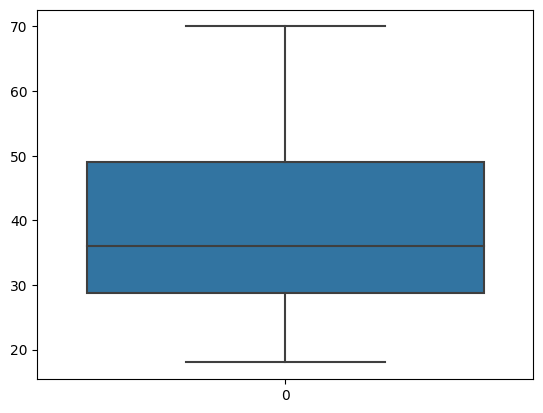

In [14]:
sns.boxplot(df.Age)### 6. Find the outliers and replace them outliers

In [15]:
Outlier=df["Annual Income (k$)"].quantile(0.99)
Outlier

126.1099999999999

In [16]:
df["Annual Income (k$)"]=np.where(df["Annual Income (k$)"]>=Outlier,df["Annual Income (k$)"].median(),df["Annual Income (k$)"])

<AxesSubplot: >

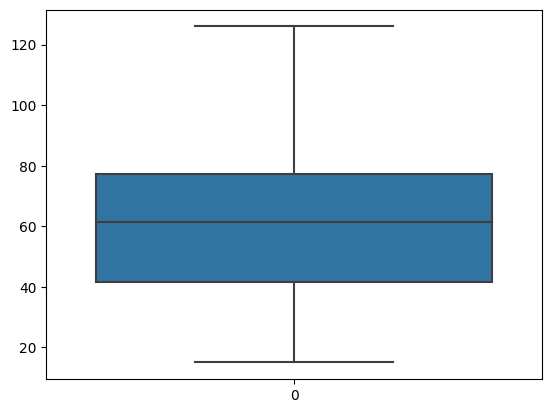

In [17]:
sns.boxplot(df["Annual Income (k$)"])

<AxesSubplot: >

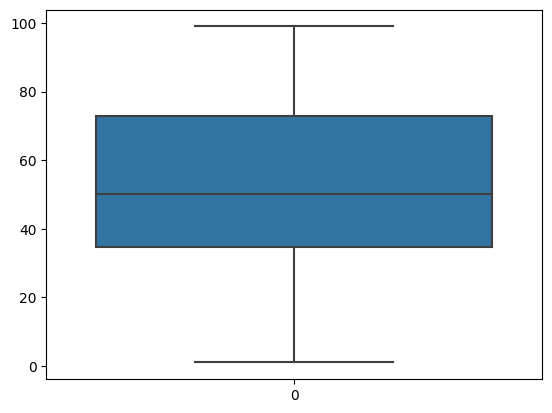

In [18]:
sns.boxplot(df["Spending Score (1-100)"])

### 7. Check for Categorical columns and perform encoding.

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
df.Gender=le.fit_transform(df.Gender)

In [21]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


#### 8. Scaling the data

In [22]:
from sklearn.preprocessing import scale
df=pd.DataFrame(scale(df),columns=df.columns)

In [23]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.788777,-0.434801
1,1.128152,-1.281035,-1.788777,1.195704
2,-0.886405,-1.352802,-1.748853,-1.715913
3,-0.886405,-1.137502,-1.748853,1.040418
4,-0.886405,-0.563369,-1.708930,-0.395980


### 9. Perform any of the clustering algorithms

In [24]:
from sklearn.cluster import KMeans

In [25]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

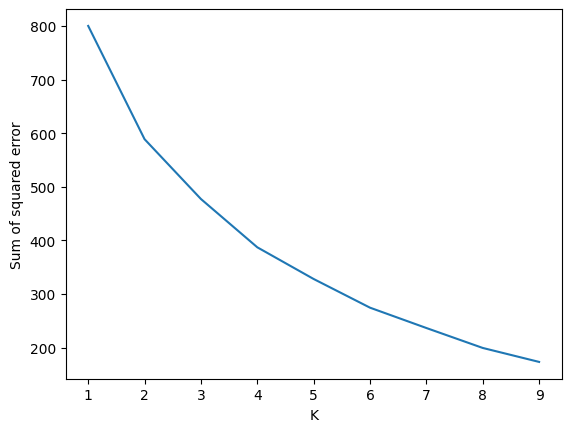

In [26]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [27]:
model=KMeans(n_clusters=2)
model

KMeans(n_clusters=2)

In [28]:
y_predicted=model.fit_predict(df)
y_predicted

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])